In [29]:
import os
import glob

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from statannot import add_stat_annotation

from itertools import cycle

In [2]:
# Open SkySat datasets

data_20 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

dfs = [data_20, data_21, data_22]

In [3]:
# Add VIs
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    
    return df

In [4]:
for df in dfs:
    
    add_vis(df)
    
    df['inc_class'] = 'low'
    df.loc[df['DM_inc']>25,'inc_class']= 'high'
    
    df['sev_class'] = 'low'
    df.loc[df['DM_severity']>10,'sev_class']= 'high'
    
    df['ndvi_bin'] = pd.cut(df['ndvi'], 2, labels=["low_ndvi", "high_ndvi"])
    
    #sev and ndvi
    df.loc[(df['ndvi_bin']=='low_ndvi')&(df['sev_class']=='low'),'ndvi_sev']= 'low_n,low_s'
    df.loc[(df['ndvi_bin']=='low_ndvi')&(df['sev_class']=='high'),'ndvi_sev']= 'low_n,high_s'
    
    df.loc[(df['ndvi_bin']=='high_ndvi')&(df['sev_class']=='low'),'ndvi_sev']= 'high_n,low_s'
    df.loc[(df['ndvi_bin']=='high_ndvi')&(df['sev_class']=='high'),'ndvi_sev']= 'high_n,high_s'
    
    #inc and ndvi
    df.loc[(df['ndvi_bin']=='low_ndvi')&(df['inc_class']=='low'),'ndvi_inc']= 'low_n,low_i'
    df.loc[(df['ndvi_bin']=='low_ndvi')&(df['inc_class']=='high'),'ndvi_inc']= 'low_n,high_i'

    
    df.loc[(df['ndvi_bin']=='high_ndvi')&(df['inc_class']=='low'),'ndvi_inc']= 'high_n,low_i'
    df.loc[(df['ndvi_bin']=='high_ndvi')&(df['inc_class']=='high'),'ndvi_inc']= 'high_n,high_i'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_high_n,low_s v.s. 2020-08-06_high_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.035e-01 U_stat=4.650e+02
2020-08-13_high_n,low_s v.s. 2020-08-13_high_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.302e-04 U_stat=1.209e+03


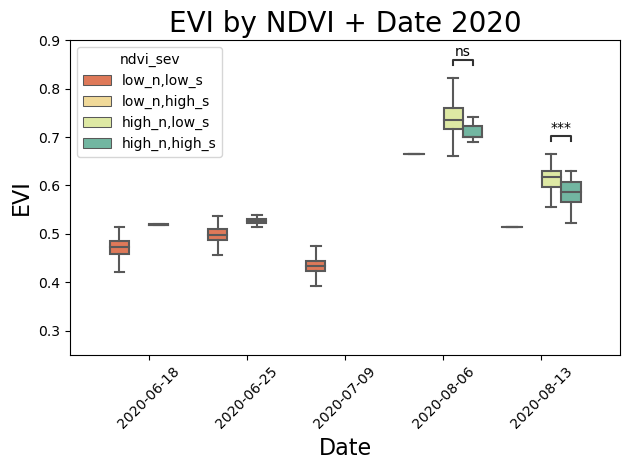

In [12]:
#Severity 2020

x = "Date"
y = "evi"
hue = "ndvi_sev"

hue_order=['low_n,low_s', 'low_n,high_s',
          'high_n,low_s', 'high_n,high_s']

order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], 'low_n,low_s'), (order[0], 'low_n,high_s')),

#     ((order[0], 'high_n,low_s'), (order[0], 'high_n,high_s')),
    
#     ((order[1], 'low_n,low_s'), (order[1], 'low_n,high_s')),

#     ((order[1], 'high_n,low_s'), (order[1], 'high_n,high_s')),
    
#     ((order[2], 'low_n,low_s'), (order[2], 'low_n,high_s')),

#     ((order[2], 'high_n,low_s'), (order[2], 'high_n,high_s')),
    
#     ((order[3], 'low_n,low_s'), (order[3], 'low_n,high_s')),

    ((order[3], 'high_n,low_s'), (order[3], 'high_n,high_s')),

#     ((order[4], 'low_n,low_s'), (order[4], 'low_n,high_s')),

    ((order[4], 'high_n,low_s'), (order[4], 'high_n,high_s'))
    ]

# colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette('Spectral', n_colors=4))

ax = sns.boxplot(data=dfs[0], x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=45)

add_stat_annotation(ax, data=dfs[0], x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                     test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

# low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
# high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

# plt.legend(title='GDM Severity',
#            loc='upper left',
#            #handles=[low_patch, high_patch],
#           bbox_to_anchor=(1.02, 1))

# plt.figtext(0.92, 0.5, 
#             'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
#             fontsize=12)

plt.title("EVI by NDVI + Date 2020", fontsize=20)

plt.tight_layout()
#plt.savefig("fig3_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_high_n,low_i v.s. 2020-08-06_high_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.849e-04 U_stat=1.754e+03
2020-07-09_low_n,low_i v.s. 2020-07-09_low_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.773e-02 U_stat=2.150e+01
2020-08-13_high_n,low_i v.s. 2020-08-13_high_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.629e-03 U_stat=1.618e+03


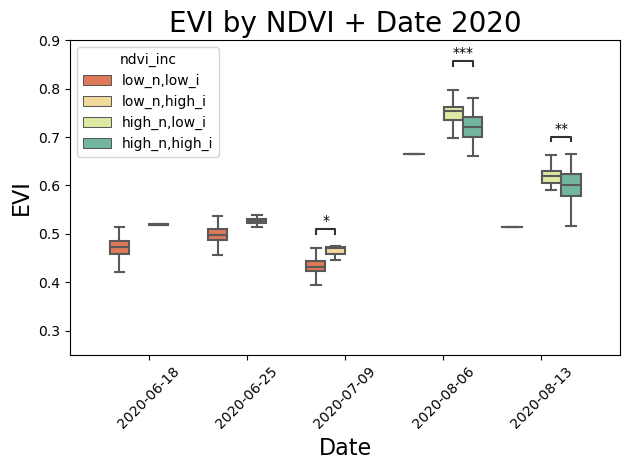

In [11]:
#Incidence 2020

x = "Date"
y = "evi"
hue = "ndvi_inc"

hue_order=['low_n,low_i', 'low_n,high_i',
          'high_n,low_i', 'high_n,high_i']

order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], 'low_n,low_i'), (order[0], 'low_n,high_i')),

#     ((order[0], 'high_n,low_i'), (order[0], 'high_n,high_i')),
    
#     ((order[1], 'low_n,low_i'), (order[1], 'low_n,high_i')),

#     ((order[1], 'high_n,low_i'), (order[1], 'high_n,high_i')),
    
    ((order[2], 'low_n,low_i'), (order[2], 'low_n,high_i')),

#     ((order[2], 'high_n,low_i'), (order[2], 'high_n,high_i')),
    
#     ((order[3], 'low_n,low_i'), (order[3], 'low_n,high_i')),

    ((order[3], 'high_n,low_i'), (order[3], 'high_n,high_i')),

#     ((order[4], 'low_n,low_i'), (order[4], 'low_n,high_i')),

    ((order[4], 'high_n,low_i'), (order[4], 'high_n,high_i'))
    ]

# colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette('Spectral', n_colors=4))

ax = sns.boxplot(data=dfs[0], x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=45)

add_stat_annotation(ax, data=dfs[0], x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                     test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

# low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
# high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

# plt.legend(title='GDM Severity',
#            loc='upper left',
#            #handles=[low_patch, high_patch],
#           bbox_to_anchor=(1.02, 1))

# plt.figtext(0.92, 0.5, 
#             'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
#             fontsize=12)

plt.title("EVI by NDVI + Date 2020", fontsize=20)

plt.tight_layout()
#plt.savefig("fig3_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_high_n,low_s v.s. 2021-08-03_high_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.633e-02 U_stat=3.454e+03
2021-08-10_high_n,low_s v.s. 2021-08-10_high_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.487e-01 U_stat=4.144e+03
2021-08-17_low_n,low_s v.s. 2021-08-17_low_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.711e+03
2021-07-27_high_n,low_s v.s. 2021-07-27_high_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.020e+02
2021-07-27_low_n,low_s v.s. 2021-07-27_low_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.924e-01 U_stat=1.160e+02
2021-08-17_high_n,low_s v.s. 2021-08-17_high_n,high_s: Mann-Whitney-Wilcoxo

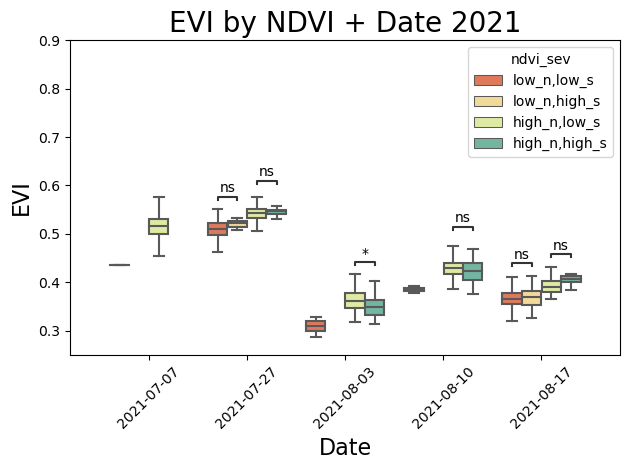

In [14]:
#Severity 2021

x = "Date"
y = "evi"
hue = "ndvi_sev"

hue_order=['low_n,low_s', 'low_n,high_s',
          'high_n,low_s', 'high_n,high_s']

order = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17']
pairs=[
#     ((order[0], 'low_n,low_s'), (order[0], 'low_n,high_s')),

#     ((order[0], 'high_n,low_s'), (order[0], 'high_n,high_s')),
    
    ((order[1], 'low_n,low_s'), (order[1], 'low_n,high_s')),

    ((order[1], 'high_n,low_s'), (order[1], 'high_n,high_s')),
    
#     ((order[2], 'low_n,low_s'), (order[2], 'low_n,high_s')),

    ((order[2], 'high_n,low_s'), (order[2], 'high_n,high_s')),
    
#     ((order[3], 'low_n,low_s'), (order[3], 'low_n,high_s')),

    ((order[3], 'high_n,low_s'), (order[3], 'high_n,high_s')),

    ((order[4], 'low_n,low_s'), (order[4], 'low_n,high_s')),

    ((order[4], 'high_n,low_s'), (order[4], 'high_n,high_s'))
    ]

# colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette('Spectral', n_colors=4))

ax = sns.boxplot(data=dfs[1], x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10','2021-08-17'], 
                   rotation=45)

add_stat_annotation(ax, data=dfs[1], x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                     test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

# low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
# high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

# plt.legend(title='GDM Severity',
#            loc='upper left',
#            #handles=[low_patch, high_patch],
#           bbox_to_anchor=(1.02, 1))

# plt.figtext(0.92, 0.5, 
#             'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
#             fontsize=12)

plt.title("EVI by NDVI + Date 2021", fontsize=20)

plt.tight_layout()
#plt.savefig("fig3_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-10_high_n,low_i v.s. 2021-08-10_high_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.020e-01 U_stat=4.514e+03
2021-08-17_low_n,low_i v.s. 2021-08-17_low_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.553e-02 U_stat=2.797e+03
2021-07-27_high_n,low_i v.s. 2021-07-27_high_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.624e+03
2021-07-07_high_n,low_i v.s. 2021-07-07_high_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.530e+02
2021-07-27_low_n,low_i v.s. 2021-07-27_low_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.166e-02 U_stat=1.190e+02
2021-08-17_high_n,low_i v.s. 2021-08-17_high_n,high_i: Mann-Whitney-Wilcoxo

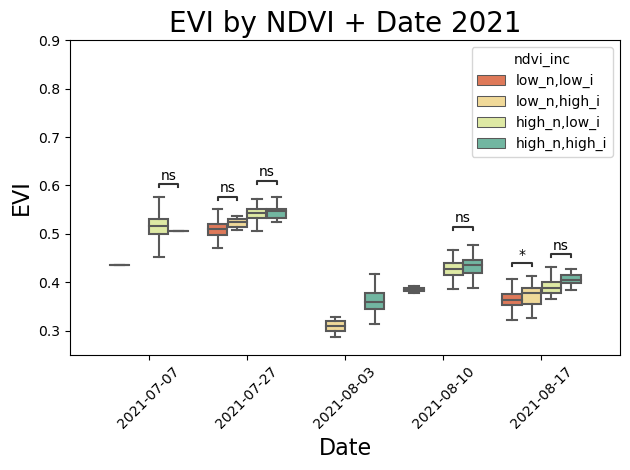

In [16]:
#Incidence 2021

x = "Date"
y = "evi"
hue = "ndvi_inc"

hue_order=['low_n,low_i', 'low_n,high_i',
          'high_n,low_i', 'high_n,high_i']

order = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10','2021-08-17']
pairs=[
#      ((order[0], 'low_n,low_i'), (order[0], 'low_n,high_i')),

    ((order[0], 'high_n,low_i'), (order[0], 'high_n,high_i')),
    
     ((order[1], 'low_n,low_i'), (order[1], 'low_n,high_i')),

     ((order[1], 'high_n,low_i'), (order[1], 'high_n,high_i')),
    
#      ((order[2], 'low_n,low_i'), (order[2], 'low_n,high_i')),

#      ((order[2], 'high_n,low_i'), (order[2], 'high_n,high_i')),
    
#      ((order[3], 'low_n,low_i'), (order[3], 'low_n,high_i')),

    ((order[3], 'high_n,low_i'), (order[3], 'high_n,high_i')),

    ((order[4], 'low_n,low_i'), (order[4], 'low_n,high_i')),

     ((order[4], 'high_n,low_i'), (order[4], 'high_n,high_i'))
    ]

# colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette('Spectral', n_colors=4))

ax = sns.boxplot(data=dfs[1], x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10','2021-08-17'], 
                   rotation=45)

add_stat_annotation(ax, data=dfs[1], x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                     test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

# low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
# high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

# plt.legend(title='GDM Severity',
#            loc='upper left',
#            #handles=[low_patch, high_patch],
#           bbox_to_anchor=(1.02, 1))

# plt.figtext(0.92, 0.5, 
#             'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
#             fontsize=12)

plt.title("EVI by NDVI + Date 2021", fontsize=20)

plt.tight_layout()
#plt.savefig("fig3_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-20_high_n,low_s v.s. 2022-07-20_high_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.620e+02
2022-07-06_high_n,low_s v.s. 2022-07-06_high_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.690e-01 U_stat=1.040e+02
2022-07-06_low_n,low_s v.s. 2022-07-06_low_n,high_s: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.770e+02


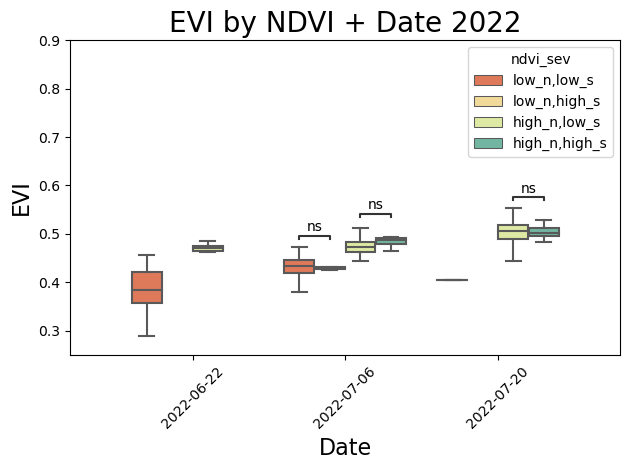

In [18]:
#Severity 2022

x = "Date"
y = "evi"
hue = "ndvi_sev"

hue_order=['low_n,low_s', 'low_n,high_s',

          'high_n,low_s', 'high_n,high_s']

order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
#     ((order[0], 'low_n,low_s'), (order[0], 'low_n,high_s')),

#      ((order[0], 'high_n,low_s'), (order[0], 'high_n,high_s')),
    
     ((order[1], 'low_n,low_s'), (order[1], 'low_n,high_s')),

     ((order[1], 'high_n,low_s'), (order[1], 'high_n,high_s')),
    
#     ((order[2], 'low_n,low_s'), (order[2], 'low_n,high_s')),

    ((order[2], 'high_n,low_s'), (order[2], 'high_n,high_s')),

    ]

# colors = ["#4CAF50", "#FFDD33"]
# sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dfs[2], x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=45)

add_stat_annotation(ax, data=dfs[2], x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                     test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

# low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
# high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

# plt.legend(title='GDM Severity',
#            loc='upper left',
#            #handles=[low_patch, high_patch],
#           bbox_to_anchor=(1.02, 1))

# plt.figtext(0.92, 0.5, 
#             'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
#             fontsize=12)

plt.title("EVI by NDVI + Date 2022", fontsize=20)

plt.tight_layout()
#plt.savefig("fig3_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-20_high_n,low_i v.s. 2022-07-20_high_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.882e-01 U_stat=1.117e+03
2022-07-06_high_n,low_i v.s. 2022-07-06_high_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.390e-01 U_stat=4.810e+02
2022-06-22_low_n,low_i v.s. 2022-06-22_low_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.500e+01
2022-07-06_low_n,low_i v.s. 2022-07-06_low_n,high_i: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.230e+02


Text(0.5, 1.0, 'EVI by NDVI + Date 2022')

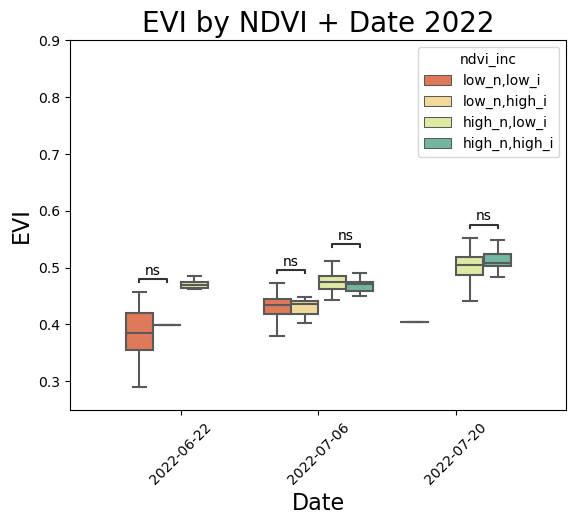

In [39]:
#Incidence 2022

x = "Date"
y = "evi"
hue = "ndvi_inc"

hue_order=['low_n,low_i', 'low_n,high_i',

          'high_n,low_i', 'high_n,high_i']

order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
    ((order[0], 'low_n,low_i'), (order[0], 'low_n,high_i')),

    #((order[0], 'high_n,low_i'), (order[0], 'high_n,high_i')),
    
    ((order[1], 'low_n,low_i'), (order[1], 'low_n,high_i')),

    ((order[1], 'high_n,low_i'), (order[1], 'high_n,high_i')),
    
    #((order[2], 'low_n,low_i'), (order[2], 'low_n,high_i')),

    ((order[2], 'high_n,low_i'), (order[2], 'high_n,high_i')),
    ]

# colors = ["#4CAF50", "#FFDD33"]
#sns.color_palette("Spectral", as_cmap=True)
sns.set_palette("Spectral", n_colors=4)
# my_pal = {"low_n,low_i": "g", "low_n,high_i": "b", 
#           'med_n,low_i':, 'med_n,high_i':,
#           'high_n,low_i':, 'high_n,high_i':}


ax = sns.boxplot(data=dfs[2], x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=45)

add_stat_annotation(ax, data=dfs[2], x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                     test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
# ##
#Test creating legend artist

# low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
# high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

# plt.legend(title='GDM Severity',
#            loc='upper left',
#            #handles=[low_patch, high_patch],
#           bbox_to_anchor=(1.02, 1))

# plt.figtext(0.92, 0.5, 
#             'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
#             fontsize=12)

plt.title("EVI by NDVI + Date 2022", fontsize=20)

#plt.tight_layout()
#plt.savefig("fig3_sev_2020.svg")